In [1]:
# UNDERSTANDING THE BUSINESS & DATA - The first step involves understanding the business and the data, done in combination by setting up the notebook to load the Airbnb data, and assessing the data in the dataset. After assessing the data, it is prepared and cleaned for further evaluation, modelling, and visualization.

## Setup notebook - Import libraries used in notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict
import plotly.express as px
import seaborn as sns
%matplotlib inline

## Gather data
### Read Boston Airbnb data into the dataframe df
df = pd.read_csv('./data/boston_airbnb/listings.csv')

## Assess the data
### Display the head of the dataframe to show the data it contains
df.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [2]:
### To assess the data in more detail, the shape (number of rows and columns) and the names of all the data columns are shown
print(df.shape)
print(df.columns)

(3585, 95)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       '

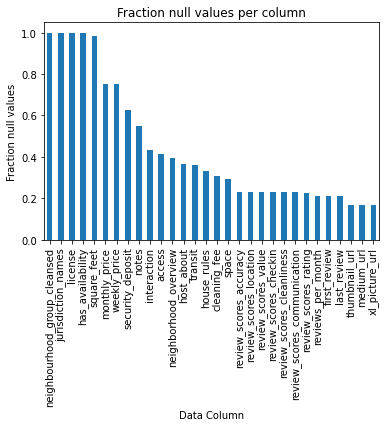

In [3]:
### As part of assessment, it needs to be determined how many null values are contained in each column, to decide whether to drop columns or possibly fill with means/modes
### A plot is generated of the fraction of null values in each column

#### Get a list of the fraction of null values in each column, sort in descending order
vals = df.isnull().mean().sort_values(ascending=False)

#### Plot the list of fractions null values per column - columns indicated from left that has high number of null values
(vals[:30]).plot(kind="bar", title="Fraction null values per column", xlabel="Data Column", ylabel="Fraction null values");

In [4]:
# PREPARATION OF DATA - The data is prepared in such a way for it to be used in answering the business questions. 

## Clean the data - remove columns

### From evaluating the fractions of null values per column in the previous step, the column names are identified that has more than 50% null values

#### Get and show a list of the names of the columns with more than 50% null values
missing_cols = set(df.columns[df.isnull().mean()>0.5])
print(missing_cols)

{'weekly_price', 'square_feet', 'monthly_price', 'has_availability', 'security_deposit', 'license', 'jurisdiction_names', 'neighbourhood_group_cleansed', 'notes'}


In [5]:
## Clean the data - remove rows

### As part of the data preparation step, the data is cleaned by removing columns with more than 50% missing values. The columns removed are considered not important for the analysis and it will not have any impact on the outcome if they are removed.

#### Remove the columns not important
df = df.drop(missing_cols, axis=1, inplace=False)

#### Display the number of rows and columns remaining in the data
print(df.shape)

#### A total of 9 columns were dropped, leaving 86 data columns for further analyses. On the plot above, the data columns excluded are those listed from "neighbourhood_group_cleansed" to "weekly price" (on the far left x-axis).

(3585, 86)


In [6]:
## Clean the data - replace $-sign in price column and convert to numeric

### The price per listing was of primary importance, and data cleaning thereof was needed. The "$"-sign had to be removed and the data values converted from text to numerical data type.
### To enable numeric modelling with price, the "$"-sign is removed from the values, and the column converted to numeric type

#### Display the head of the data to show the price column with the "$"-sign 
print(df['price'].head())

#### Remove the "$"-sign by replacing it with an empty string
df['price'] =  df['price'].replace({'\$':''}, regex = True)

#### Comvert the price column to numeric type 
df['price'] =  pd.to_numeric(df['price'] ,errors='coerce')

#### Display the head of the data to show the price column with the "$"-sign removed
print(df['price'].head())

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object
0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64


In [7]:
## Re-assess the data by determining how many missing values there are in the price column

### Display the number of rows and columns remaining in the data
print(df.shape)

### Display the number of listings with null values in the price column
print(df['price'].isnull().sum())

(3585, 86)
12


In [8]:
## Clean the data - remove rows with missing price

### In the previous step it was determined that only 12 of the 3585 listings don't have price values
### Clean the data by removing the rows with missing price values rather than filling it in with the mean or another estimate

#### The rows are dropped with no price value
df = df.dropna(subset=['price'], axis=0)

#### Display the number of rows and columns remaining in the data
print(df.shape)

#### Display the fraction of listings with null values in the price column - confirm it is zero since all were removed in previous step
print(df['price'].isnull().mean())

(3573, 86)
0.0


In [9]:
## Analyse - mean price per listing

### Descriptive statistics are displayed of the price column to establish if listings with prices beyond a certain value can be excluded so not to skew the results
df['price'].describe()

count    3573.000000
mean      169.072768
std       111.677022
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max       999.000000
Name: price, dtype: float64

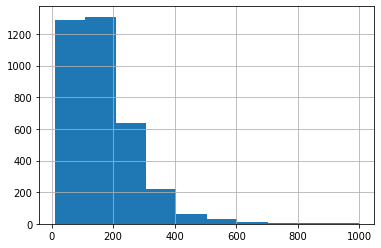

In [10]:
### As part of the analysis of price, a histogram is displayed of price
df['price'].hist();

In [11]:
## Clean the data - remove listings with prices > $400

### Statistics on price indicated the mean price to be $169.07 and a standard deviation of $111.68. Most of the listings were priced below $400, and the 114 listings with prices more than $400 were considered outliers and dropped from the data, leaving data for 3459 listings. The histogram below shows distribution of price for the listings in the data with prices $400 or less.

#### Data is removed of the outlier listing with exceptionally high prices (>$400)
df = df[df['price']<=400]

#### Display the number of rows and columns remaining in the data
print(df.shape)

(3459, 86)


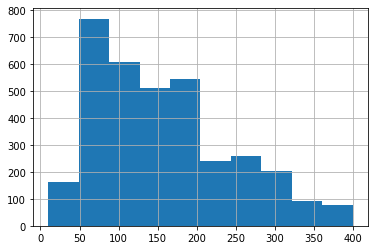

In [12]:
#### After removing the outlier listings with prices > $400, display again a histogram of prices per listing, indicating the prices are skewed to the right
df['price'].hist();


In [13]:
# MODELLING AND EVALUATION - Following on understanding and preparation of the data, modelling and evaluation methods are used on the data to answer the business questions. This includes steps of analysis, modelling, and visualisation. This migh also include additional steps of data assessment and cleaning prior to analysis, modelling, and visualisation

## QUESTION 1: Who are the most popular hosts?

### Understanding the business and data - The popularity of the hosts were evaluated in terms of the number of listings, and the mean price and review score of each host. A histogram of the total number of listings per host reveals that most hosts have one or two listings, and a minority of hosts have more listings.

### Preparation of data - copy the prepared dataframe for further processing specific to answering this business question
df1 = df.copy()

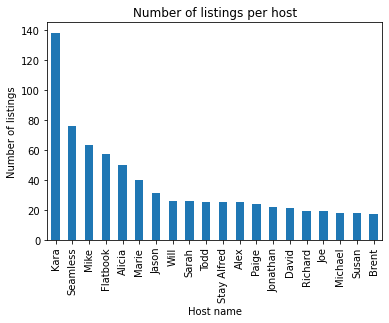

In [14]:
### Analyse the data - get the number of listings per host

#### Get the total number of listings per host
vals = df1['host_name'].value_counts()

#### Plot on a bar chart the number of listing per host for the top 20 hosts
((vals[:20])).plot(kind="bar", title="Number of listings per host", xlabel="Host name", ylabel="Number of listings");

In [15]:
#### As part of assessment of the data, the values of the number of listings per host are shown, as plotted in the previous step
print(vals)

#### The number of listings per host data indicates that Kara has by far the most listings (138), followed by Seamless, Mike, Flatbook and Alicia all with 50 or more listings

Kara                138
Seamless             76
Mike                 63
Flatbook             57
Alicia               50
                   ... 
Jess                  1
Alex And Morgane      1
Svetlana              1
Howard                1
Annalisa              1
Name: host_name, Length: 1299, dtype: int64


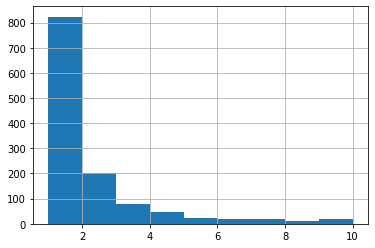

In [16]:
#### As part of further assessment of the data, display a histogram of the total number of listings per host, setting the bins from 1 to 10 in steps of 1
vals.hist(bins=[1,2,3,4,5,6,7,8,9,10]);

#### The histogram of the total number of listings per host reveals that most hosts have one or two listings, and a minority of hosts have more listings.

In [17]:
### Preparation of data - data is prepared from the main dataframe to give the number of listing, mean price, and mean review score rate per host for further analysis and seeking correlation between the parameters

#### Data is filtered to include only hosts with more than one listing only so that the popularity of hosts are only determined for hosts with multiple listings
df1 = df1.groupby('host_name').filter(lambda x: len(x) > 1) 

#### Get a new datafram with the number of listings, mean listing price, and mean review score per host
df1 = df1.groupby(['host_name']).agg({'id':"count", 'price':"mean", 'review_scores_rating':"mean"})

#### Rename the "id" column to "count" since it contains the number of listings per host
df1 = df1.rename(columns={'id': 'count'},inplace=False)

#### Sort the data in descending order by the number of listings per host to show again the host with the most listings at the top (Kara)
df1 = df1.sort_values("count", ascending=False)

#### Display the data
print(df1)

              count       price  review_scores_rating
host_name                                            
Kara            138  235.789855             85.096154
Seamless         76  296.868421             88.634921
Mike             63  277.126984             89.163265
Flatbook         57  213.894737             91.256410
Alicia           50  152.500000             91.361111
...             ...         ...                   ...
Jenna             2  141.000000                   NaN
Jeremy            2   91.000000             95.500000
Jill              2  192.500000             99.500000
Jim & Afiyah      2   72.500000             88.000000
英硕                2   75.000000                   NaN

[476 rows x 3 columns]


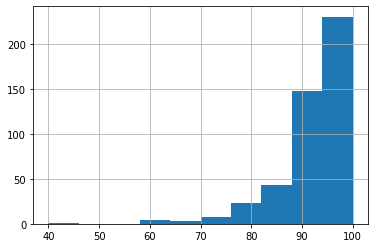

In [18]:
### Analyse the data - mean review score per host

#### Display a histogram of mean review score per host - review scores are on average 92.1 and skewed to the left, with scores for most host above 90
df1['review_scores_rating'].hist();

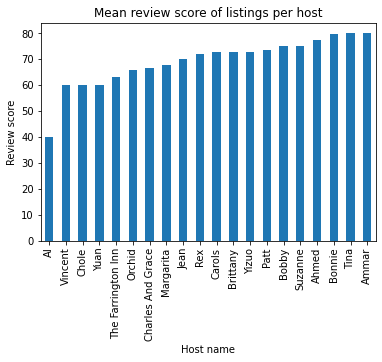

In [19]:
#### As part of analysing the data in terms of mean review score, the data is sorted with review score in ascending order to determine the hosts having the lowest scores and to avoid

#### Sort the data with mean review score in ascending order
df1 = df1.sort_values("review_scores_rating", ascending=True)

#### Plot a bar chart the mean review score per host for the 20 lowest scores
((df1['review_scores_rating'][:20])).plot(kind="bar", title="Mean review score of listings per host", xlabel="Host name", ylabel="Review score");

#### The plot of the 20 hosts with the lowest average review scores indicates that Al has by far the lowest review score of 40, followed by Chole, Yuan and Vincent with scores of 60.

In [20]:
#### Part of the analysis, display the data sorted by review scores in ascending order to show the hosts and values of the lower review scores
print(df1.head(20))

                    count       price  review_scores_rating
host_name                                                  
Al                      2  119.500000             40.000000
Vincent                 2   79.000000             60.000000
Chole                   2  118.500000             60.000000
Yuan                    2   41.500000             60.000000
The Farrington Inn      4  136.250000             63.333333
Orchid                 15   58.066667             65.785714
Charles And Grace       5  130.000000             66.666667
Margarita               2   75.000000             68.000000
Jean                    5   55.000000             70.000000
Rex                     2   70.000000             72.000000
Carols                  3   65.000000             72.666667
Brittany                2   82.500000             73.000000
Yizuo                   2   57.500000             73.000000
Patt                    2  235.000000             73.500000
Bobby                   2  199.500000   

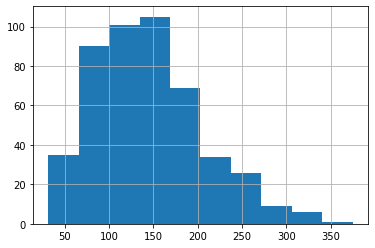

In [21]:
### Analyse the data - mean price per host

#### Display a histogram of mean price per host - all prices < $400 because it was filtered to exclude listings with price > $400. Prices are mostly in the range $75 to $200, with the distribution skewed to the right
df1['price'].hist();

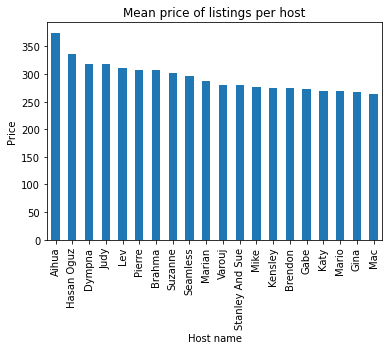

In [22]:
#### As part of the analysis of mean price per host, the data per host is sorted by the mean price in descending order to display the hosts with the highest prices first

#### Sort the data by mean price in decending order
df1 = df1.sort_values("price", ascending=False)

#### Plot a bar chart of the mean price per host for the 20 highest scores
((df1['price'][:20])).plot(kind="bar", title="Mean price of listings per host", xlabel="Host name", ylabel="Price");

In [23]:
#### Part of the analysis, display the data sorted by mean price in decending order to show the hosts and values of the highest prices

df1 = df1.sort_values("price", ascending=False)
print(df1.head(20))

#### A plot of the mean listings price per host for the top 20 hosts by mean listing price, indicates that Aihua has the listings with the highest mean price of $375, exceeding that of Hasan Oguz with $40.

                 count       price  review_scores_rating
host_name                                               
Aihua                2  375.000000             80.500000
Hasan Oguz           2  335.500000             97.500000
Dympna               4  318.250000            100.000000
Judy                 2  317.500000             95.000000
Lev                  2  311.500000             98.500000
Pierre               4  307.500000                   NaN
Brahma               3  306.666667             92.000000
Suzanne              2  302.500000             75.000000
Seamless            76  296.868421             88.634921
Marian               2  287.500000             96.500000
Varouj               2  280.000000             97.000000
Stanley And Sue      5  280.000000             90.800000
Mike                63  277.126984             89.163265
Kensley              3  275.000000             84.000000
Brendon              2  274.500000             92.000000
Gabe                 2  272.500

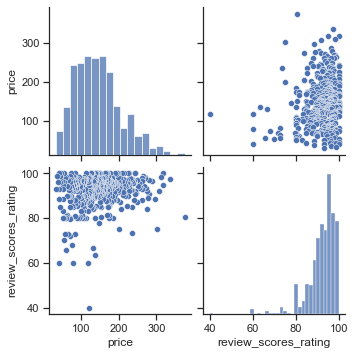

In [24]:
### Visualize the data - mean review score vs. mean price per host - the distribution and correlation between these parameters are explored

#### A pair plot is generated to show the histograms of the mean review score and mean price per host parameters, as well as correlation plots of these parameters against each other - A positive correlation between price and review score is indicated.
sns.set_theme(style="ticks")
sns.pairplot(df1[['price','review_scores_rating']]);

In [25]:
#### As part of the analysis of mean price and mean review score per host, the descriptive statistics are displayed of these parameters. The mean price is indicated as $143.95, and mean review score as 92.1
df1.describe()

count       price  review_scores_rating
count  476.000000  476.000000            460.000000
mean     5.537815  143.952973             92.102598
std      9.330687   60.839745              7.109249
min      2.000000   31.500000             40.000000
25%      2.000000   99.136364             89.898485
50%      3.000000  137.500000             93.928571
75%      6.000000  176.250000             96.517857
max    138.000000  375.000000            100.000000

In [26]:
## QUESTION 2: Which neighbourhoods are you most likely to stay in?

### Understanding the business and data - To determine which neighbourhood one is most likely to stay in, an approach similar to that of the first question was followed, the popularity of the regions were evaluated in terms of the number of listings, and the mean price and review scores. 

### Preparation of data - copy the prepared dataframe originally for further processing specific to answering this business question
df2 = df.copy()

In [27]:
### Preparation of data - data is prepared from the main dataframe to give the number of listing, mean price, and mean review score rate per reqgion for further analysis and seeking correlation between the parameters

#### Get a new datafram with the number of listings, mean listing price, and mean review score per reqgion
df2 = df2.groupby(['neighbourhood']).agg({'id':"count", 'price':"mean", 'review_scores_rating':"mean", 'number_of_reviews':"mean", 'latitude':"mean",'longitude':"mean"})

#### Rename the "id" column to "count" since it contains the number of listings per region
df2 = df2.rename(columns={'id': 'count'},inplace=False)

#### Sort the data in descending order by the number of listings per reqgion to show the region with the most listings at the top
df2 = df2.sort_values('count', ascending=False)

#### Display the data, and the number of rows and columns of the data
print(df2)
print(df2.shape)

                    count       price  review_scores_rating  \
neighbourhood                                                 
Allston-Brighton      359  107.331476             90.022642   
Jamaica Plain         302  125.221854             94.451737   
South End             283  185.109541             93.008511   
Back Bay              265  214.709434             91.331707   
Fenway/Kenmore        240  196.104167             89.281250   
South Boston          198  185.949495             94.503067   
Dorchester            195   97.451282             89.579882   
Beacon Hill           165  188.151515             93.737931   
North End             122  188.770492             93.876190   
East Boston           117  124.059829             89.745283   
Roxbury               110  120.136364             90.826087   
Mission Hill          102  120.509804             87.550725   
Chinatown              78  235.410256             92.377778   
Charlestown            76  190.723684             94.16

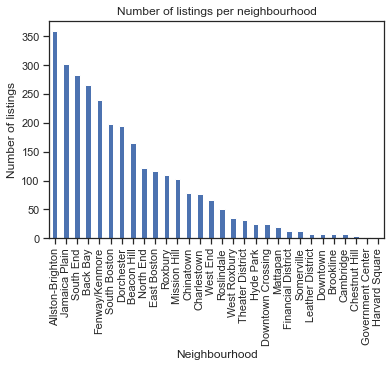

In [28]:
#### As part of analysing the data in terms of number of listings per neighbourhood, the data is sorted by number of listings in descending order to show the neighbourhoods with the highest number of listings first

#### Sort the data by number of listings per neighbourhood in decending order
df2 = df2.sort_values('count', ascending=False)

#### Plot a bar chart of the number of listings per neighbourhood for the 20 neighbourhoods with the highest number
((df2['count'])).plot(kind="bar", title="Number of listings per neighbourhood", xlabel="Neighbourhood", ylabel="Number of listings");

#### The total number of listings per neighbourhood shows Allston-Brighton to be the neighbourhood with the most listings (359), followed with Jamaica Plain, South End, Back Bay, and Fenway/Kenmore each with 240 or more listings. Other neighbourhoods each has less than 200 listings.

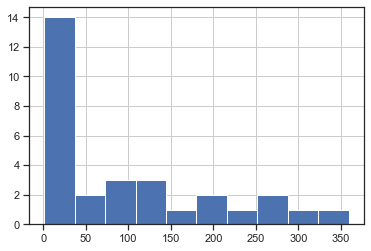

In [29]:
#### Display a histogram of number of listings per neighbourhood - most neighbourhoods have less than 50 listings, the distribution is skewed to the right
df2['count'].hist();

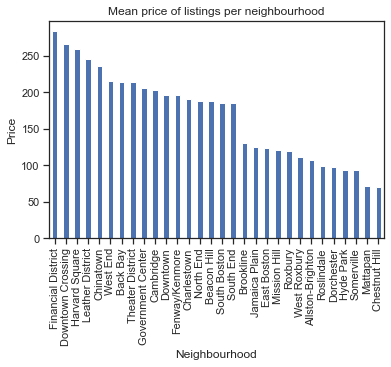

In [30]:
### Analyse the data - mean price per neighbourhood. The data is sorted by mean price per neighbourhood in descending order to determine the regions with the highest prices

#### Sort the data by mean price per neighbourhood in descending order
df2 = df2.sort_values("price", ascending=False)

#### Plot a bar chart of the mean price per neighbourhood for the 20 with the highest prices
((df2['price'])).plot(kind="bar", title="Mean price of listings per neighbourhood", xlabel="Neighbourhood", ylabel="Price");

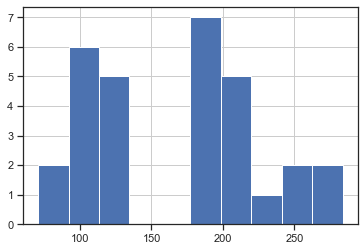

In [31]:
#### Part of the analysis, display a histogram of mean price per neighbourhood - all prices < $400 because it was filtered to exclude listings with price > $400. Prices are centred around $100 and $200
df2['price'].hist();

In [32]:
#### Part of the analysis, display the data sorted by mean price per neighbourhood in descending order to show the neighbourhoods and values with the highest prices
print(df2)

#### The mean price per neighbourhood indicates the Financial District to be in highest demand with the highest mean price of $283.69 per listing, followed by Downtown Crossing, Harvard Square, Leather District, etc. with mean prices of more than $200 per listing.

                    count       price  review_scores_rating  \
neighbourhood                                                 
Financial District     13  283.692308             98.250000   
Downtown Crossing      25  266.480000             91.000000   
Harvard Square          1  259.000000                   NaN   
Leather District        8  245.875000             98.400000   
Chinatown              78  235.410256             92.377778   
West End               66  215.060606             92.194444   
Back Bay              265  214.709434             91.331707   
Theater District       31  213.774194             89.333333   
Government Center       3  205.333333             92.000000   
Cambridge               7  203.000000             74.500000   
Downtown                8  196.500000             83.285714   
Fenway/Kenmore        240  196.104167             89.281250   
Charlestown            76  190.723684             94.166667   
North End             122  188.770492             93.87

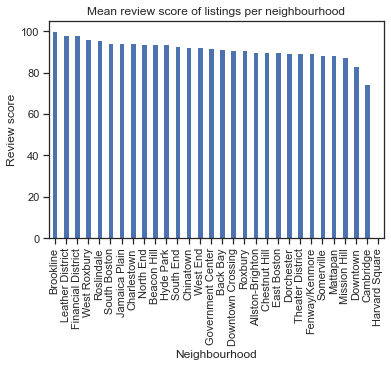

In [33]:
### Analyse the data - mean review score per neighbourhood - data is sorted by mean review score in descending order to determine the neighbourhoods with the highest ratings

#### Sort the data by the mean review score per neighbourhood in descending order
df2 = df2.sort_values("review_scores_rating", ascending=False)

#### Plot a bar chart of the mean review score per host for the 20 highest scores
((df2['review_scores_rating'])).plot(kind="bar", title="Mean review score of listings per neighbourhood", xlabel="Neighbourhood", ylabel="Review score");

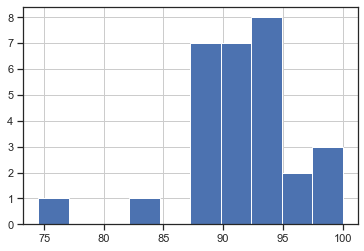

In [34]:
#### Part of the analysis, display a histogram of mean review score per neighbourhood - review scores mostly above 88, skewed to the left
df2['review_scores_rating'].hist();

In [35]:
#### Part of the analysis, display the data sorted by review scores in descending order to show the neighbourhoods and values of the highest review scores
print(df2)

#### The mean review score per neighbourhood shows the scores to be mostly above 88. The exception being the neighbourhoods of Downtown and Cambridge with low rating scores of 83.3 and 74.5, respectively. For Harvard Square there was just one listing, and no review score.

                    count       price  review_scores_rating  \
neighbourhood                                                 
Brookline               8  130.375000            100.000000   
Leather District        8  245.875000             98.400000   
Financial District     13  283.692308             98.250000   
West Roxbury           35  111.342857             96.407407   
Roslindale             50   99.160000             95.565217   
South Boston          198  185.949495             94.503067   
Jamaica Plain         302  125.221854             94.451737   
Charlestown            76  190.723684             94.166667   
North End             122  188.770492             93.876190   
Beacon Hill           165  188.151515             93.737931   
Hyde Park              25   93.680000             93.611111   
South End             283  185.109541             93.008511   
Chinatown              78  235.410256             92.377778   
West End               66  215.060606             92.19

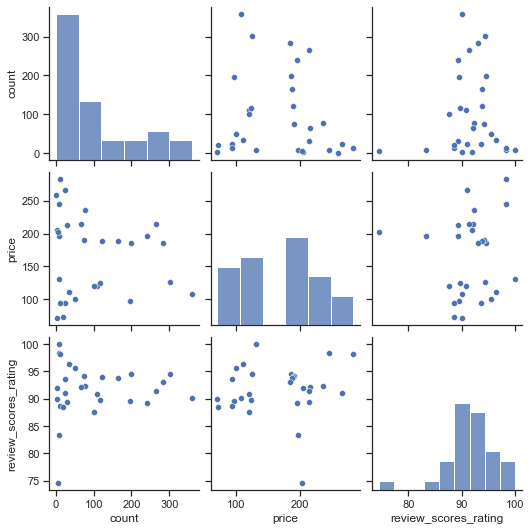

In [36]:
### Visualize the data - number of listings vs. mean review score vs. mean price per neighbourhood - the distribution and correlation between these parameters are explored - no apparent correlations
sns.set_theme(style="ticks")
sns.pairplot(df2[['count','price','review_scores_rating']]);

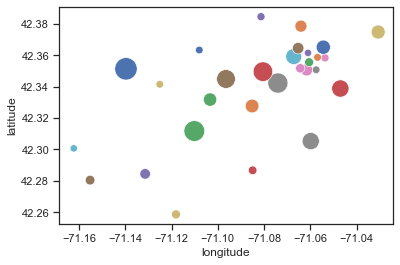

In [37]:
### Visualize the data - Display neighbourhood data on a scatterplot, showing the mean price and number of listings around Boston

#### Sort the data by the mean review score per neighbourhood in descending order
df2 = df2.sort_values("review_scores_rating", ascending=False)

#### Create a scatter plot using the mean latitude and longitude as x- and y-coordinates, colour scale as the the mean price, and  size as the mean review score of listings per neighbourhood.
sns.scatterplot(data=df2, y="latitude", x="longitude", hue="review_scores_rating",size="count", sizes=(50, 500), palette="deep", legend=False);

In [38]:
### Visualize the data - Display neighbourhood data on a map, showing the mean price and number of listings around Boston

#### Reset the dataframe index to make the neighbourhood index column a data column
df2 = df2.reset_index()

#### Specify the key for the Plotly Express map library used
mapbox_key = 'pk.eyJ1IjoiamFjcXVlc211bGxlciIsImEiOiJja25wczZrMGswY2hkMnFuenIxdWtoNXRtIn0.yV19gFMMxl4AJSVsk7My5Q'

#### Create a Plotly Express plot with mapbox basemap showing the mean price per neighbourhood as colour, and the number of listings per neighbourhood as size
fig = px.scatter_mapbox(data_frame=df2, lat="latitude", lon="longitude", color="price", size="count", hover_name='neighbourhood', zoom=10, size_max=30)
fig.update_layout(mapbox_style="light", mapbox_accesstoken=mapbox_key);
fig.show();

#### This shows mean prices per neighbourhood to be higher towards the city centre, while the mean prices and number of listings are low furthest away. The neighbourhood East Boston (top right) would appeal for being closest to the airport and relatively close to the city centre, it has 117 listings, a mean price of $124.06 and mean review score of 89.7 per listing.

In [39]:
#### As part of the analysis of mean price and mean review score per neighbourhood, display the descriptive statistics of these parameters. The mean price is indicated as $167.96, and mean review score as 91.6
df2.describe()

count       price  review_scores_rating  number_of_reviews  \
count   30.000000   30.000000             29.000000          30.000000   
mean    97.633333  167.957980             91.588900          16.183861   
std    105.163086   61.810022              4.857726          11.234391   
min      1.000000   70.750000             74.500000           0.000000   
25%     13.000000  113.541234             89.579882           7.636538   
50%     58.000000  187.050505             92.000000          14.676024   
75%    154.250000  211.663978             94.166667          22.805556   
max    359.000000  283.692308            100.000000          39.623932   

        latitude  longitude  
count  30.000000  30.000000  
mean   42.340237 -71.086048  
std     0.032054   0.034085  
min    42.258701 -71.162312  
25%    42.328709 -71.109631  
50%    42.350728 -71.077252  
75%    42.360934 -71.060623  
max    42.384542 -71.030638

In [40]:
## QUESTION 3: What determines the price, and can it be predicted?

### Understanding the business and data - To determine what factors influence the listing price, the correlation was considered between price and relevant parameters which had an acceptable level of non-null. The columns with numerical data considered were: accommodates, bathrooms, bedrooms, beds, guests_included, and number_of_reviews.

### Preparation of data - copy the prepared dataframe originally for further processing specific to answering this business question
df3 = df.copy()

In [41]:
### Preparation of data - select only specific data columns for which the regression will be performed (numeric and categorical columns)
df3 = df3[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews', 'bed_type' ]]

### Assess the data - display the selected data, and its number of rows and columns
print(df3.head())
print(df3.shape)

   accommodates  bathrooms  bedrooms  beds  price  guests_included  \
0             4        1.5       2.0   3.0  250.0                1   
1             2        1.0       1.0   1.0   65.0                0   
2             2        1.0       1.0   1.0   65.0                1   
3             4        1.0       1.0   2.0   75.0                2   
4             2        1.5       1.0   2.0   79.0                1   

   number_of_reviews  bed_type  
0                  0  Real Bed  
1                 36  Real Bed  
2                 41  Real Bed  
3                  1  Real Bed  
4                 29  Real Bed  
(3459, 8)


In [42]:
### Assess of data - determine which columns in the data are categorical data

#### Get a list of the categorical data columns
cat_df = df3.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

#### Display the list of categorical data columns - only "bed_type"
print(cat_cols_lst)

Index(['bed_type'], dtype='object')


In [43]:
#### Part of assessing the data, determine what categories are in the in bed_type column, and how many listings per category

#### Count the number of listings for each bed type
vals = df3['bed_type'].value_counts()

#### Display the number of listings per bed type - most are of type "Real Bed"
print(vals)

Real Bed         3328
Futon              51
Airbed             39
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64


In [44]:
# Function to remove the category columns, and create a column for each category with a numerical value to indicate the category
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - the pandas dataframe in which the category columns should be added
    cat_cols - list of the names of the category columns in df
    dummy_na - boolean to indicate if the rows with null values should be removed
    
    OUTPUT:
    df - a dataframe of with the specified category columns removed, and a column created for each category with a numerical value to indicate the category
    '''
    for col in  cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [45]:
### Preparation of data - In order to use the categories in regression, change the bed_type categorical column into a numerical column with a 0 or 1 to indicate the bed type per listing

#### Apply the function that converts the category columns to columns for each category
df3 = create_dummy_df(df3, cat_cols_lst, False)

#### Display the data to show the bed_type column was replaced by columns for each bed type
print(df3)

      accommodates  bathrooms  bedrooms  beds  price  guests_included  \
0                4        1.5       2.0   3.0  250.0                1   
1                2        1.0       1.0   1.0   65.0                0   
2                2        1.0       1.0   1.0   65.0                1   
3                4        1.0       1.0   2.0   75.0                2   
4                2        1.5       1.0   2.0   79.0                1   
...            ...        ...       ...   ...    ...              ...   
3580             3        1.0       1.0   1.0   69.0                1   
3581             2        1.0       1.0   1.0  150.0                1   
3582             4        1.0       1.0   1.0  198.0                1   
3583             2        1.0       1.0   1.0   65.0                1   
3584             2        1.0       1.0   1.0   65.0                1   

      number_of_reviews  bed_type_Couch  bed_type_Futon  \
0                     0               0               0   
1    

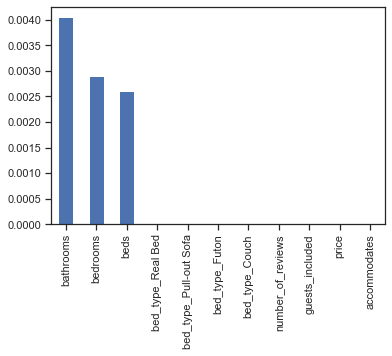

In [46]:
### Assess the data - determine the fraction of null values per data column to decide on the cleaning method to use

#### Get a list of the fraction of null values in each column, sort in descending order
vals = df3.isnull().mean().sort_values(ascending=False)

#### Plot the list of fractions null values per column - columns indicated from left that has high number of null values
(vals).plot(kind="bar");

In [47]:
### Clean the data - The columns bathrooms, bedrooms, and beds have a very low fraction of listings with null values for these parameters, and it is decided to drop the rows of listings with nulls in these columns rather than filling it in with the mean or mode

#### Remove the rows with a null value in any of the columns
df3 = df3.dropna()

#### Display the number of rows and columns of the data now, still a large number of rows remaining
df3.shape

(3431, 11)

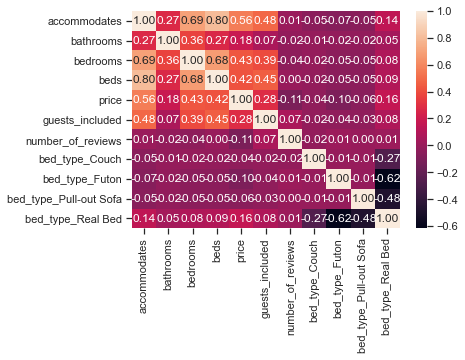

In [48]:
### Analyse the data - determine the correlation coefficients between the parameters in the data

#### Display a heat map showing the correlation coefficients between the variables in the data
sns.heatmap(df3.corr(), annot=True, fmt=".2f");

#### The heat map illustrates the correlation between all the variables against each other. Price is indicated to be strongly positive related to variables: accommodates, bathrooms, beds, and guests_included - all related to the room size and number of guests per room.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



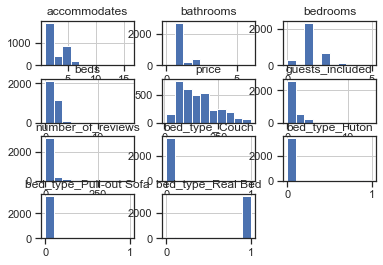

In [49]:
####### As part of the data analysis, display histograms of all the variables in the data
df3.hist();

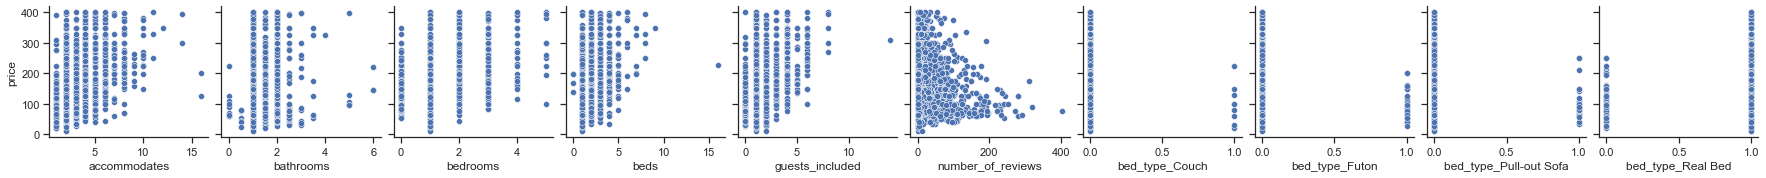

In [50]:
#### As part of the data analysis, correlation plots are displayed of price versus all the other variables (columns)
sns.set_theme(style="ticks")
sns.pairplot(data=df3, y_vars='price', x_vars=['accommodates', 'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'number_of_reviews', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed'] )

In [51]:
# Function to perform linear regression between response variable and a list of explanatory variables
def fit_linear_mod(df, response_col, explanatory_cols, test_size=.3, rand_state=42):
        
    '''
    INPUT:
    df - the pandas dataframe that contains all the data
    response_col - the column name of the response variable in df
    explanatory_cols - list of the column names of the explanatory variables in df
    
    OUTPUT:
    test_score - regression coefficient obtained for the test data
    train_score - regression coefficient obtained for the training data
    lm_model - linear regression model instance
    X_train - explanatory data values for training
    X_test - explanatory data values for testing
    y_train - response data values for training
    y_test - response data values for testing
    '''

    y = df[response_col]
    X = df[explanatory_cols]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
   
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train)

    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [52]:
### Model the data - regression between price and all the other explanatory variables in the data

#### Define the response column name
response_col = 'price'

#### Define the list of explanatory variable names
explanatory_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews',
                    'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed']

#### Apply the regression function that splits the data into training and test data, and fit a linear equation to the training data to model price as a function of all the other variables in the data
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(df3, response_col, explanatory_cols)

#### Display the regression coefficients for the training and test data - regression coefficients of 0.334 and 0.349 for the training and test data are low, showing possible room for improvement
print(train_score)
print(test_score)

0.3343000232312592
0.34894571327975543


In [53]:
### Repeat the regression of price, but this time only against the explanatory variables that had high correlation coefficients with price

#### Define the response column name
response_col = 'price'

#### Define the list of explanatory variable names as only the variables with high correlation coefficients with price
explanatory_cols = ['accommodates', 'bedrooms', 'beds' ]

#### Apply the regression function that splits the data into training and test data, and fit a linear equation to the training data to model price as a function of other selected variables in the data
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(df3, response_col, explanatory_cols)

#### Display the regression coefficients for the training and test data - regression coefficients of 0.311 and 0.334 for the training and test data are slighlty lower than the considering all the explanatory variables
print(train_score)
print(test_score)

0.31099565285266706
0.33415640086641507


In [54]:
# Function to put the linear regression equation's coefficients into a data frame
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - linear model coefficients
    X_train - exlanatory data for training
    
    OUTPUT:
    coefs_df - a dataframe with the explanatory variable names, coefficients, and absolute values of the coefficients (for sorting)
    '''

    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [55]:
### As part of modelling the data, the coefficients of the linear equation are extracted from the model of price as a function of the selected number of variables

#### Apply the function to get a list of coefficients for the linear equation model
coef_df = coef_weights(lm_model.coef_, X_train)

#### Display the list of coefficients that can be used to calculate price as a function of the explanatory variables
print(coef_df)

        est_int      coefs  abs_coefs
0  accommodates  28.915734  28.915734
1      bedrooms  11.707032  11.707032
2          beds  -7.732513   7.732513


In [56]:
### Visualise the data - show the actual prices against the prices predicted with the linear equation model in the test portion of the data

#### Create a list of the predicted prices with the test data using the linear equation model
y_test_preds = lm_model.predict(X_test)

#### Create a dataframe with the predicted prices and the actual prices of the test data
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))

#### Name the columns in the dataframe with actual and predicted prices
preds_vs_act.columns = ['actual', 'preds']

#### Add a column with the difference between the actual and predicted prices
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

#### Display the list of actual and predicted prices, and differences
print(preds_vs_act)

      actual       preds        diff
0       70.0  132.074434  -62.074434
1      250.0  189.905902   60.094098
2      115.0  103.158701   11.841299
3      100.0  132.074434  -32.074434
4      200.0  149.283136   50.716864
...      ...         ...         ...
1025   150.0  215.063642  -65.063642
1026   287.0  189.905902   97.094098
1027   250.0  143.781467  106.218533
1028   150.0  120.367402   29.632598
1029   365.0  243.979375  121.020625

[1030 rows x 3 columns]


Text(0.5, 1.0, 'Actual price vs. Predicted price')

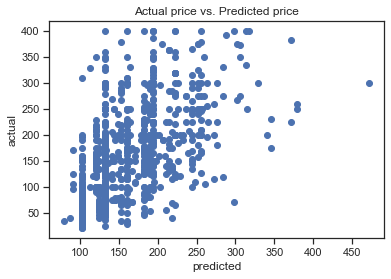

In [57]:
### Visualise the data - display the plot of the actual prices versus the predicted prices of the test data using the linear equation model

#### Create a scatter plot with predicted prices on the x-axis, and actual prices on the y-axis
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');

#### Set the axes labels, and the title of the plot
plt.xlabel('predicted');
plt.ylabel('actual');
plt.title('Actual price vs. Predicted price')

#### The scatter plot of actual versus predicted prices show a lot of scatter and that not good correlation was obtained, as also indicated by the low regression coefficient for the training and test data